In [13]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv("csv/2021-2022.csv")

In [15]:
bulan_mapping = {
    "januari": "01",
    "februari": "02",
    "maret": "03",
    "april": "04",
    "mei": "05",
    "juni": "06",
    "juli": "07",
    "agustus": "08",
    "september": "09",
    "oktober": "10",
    "november": "11",
    "desember": "12"
}


In [16]:
tanaman_input = input("Masukkan nama tanaman yang akan dipilih: ")
bulan_forecast_input = int(input("Masukkan berapa bulan kedepan yang ingin di forecast: "))

In [17]:
data_filtered = data[data["tanaman"].str.lower() == tanaman_input.lower()].copy()
data_filtered["bulan_num"] = data_filtered["bulan"].str.lower().map(bulan_mapping)
data_filtered["tanggal"] = pd.to_datetime(data_filtered["tahun"].astype(str) + "-" + data_filtered["bulan_num"] + "-01")
data_filtered = data_filtered.sort_values("tanggal")


15:28:43 - cmdstanpy - INFO - Chain [1] start processing
15:28:43 - cmdstanpy - INFO - Chain [1] done processing


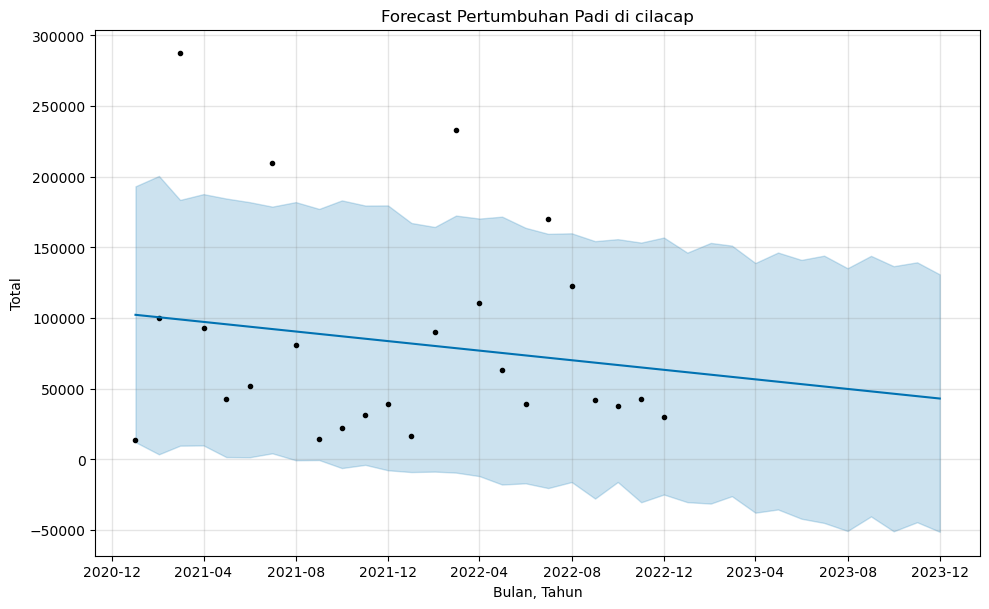

15:28:43 - cmdstanpy - INFO - Chain [1] start processing
15:28:43 - cmdstanpy - INFO - Chain [1] done processing


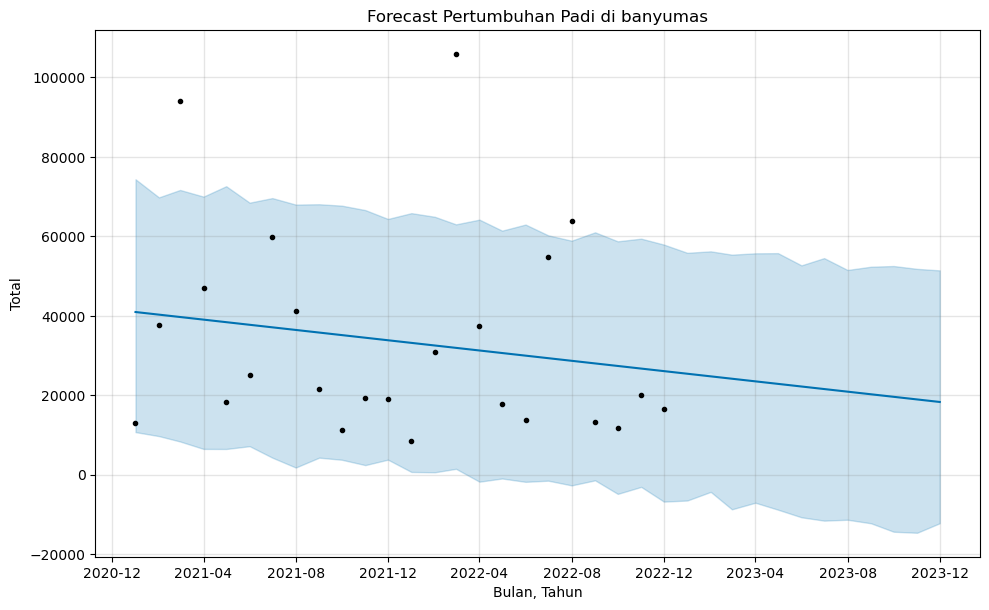

15:28:44 - cmdstanpy - INFO - Chain [1] start processing
15:28:44 - cmdstanpy - INFO - Chain [1] done processing


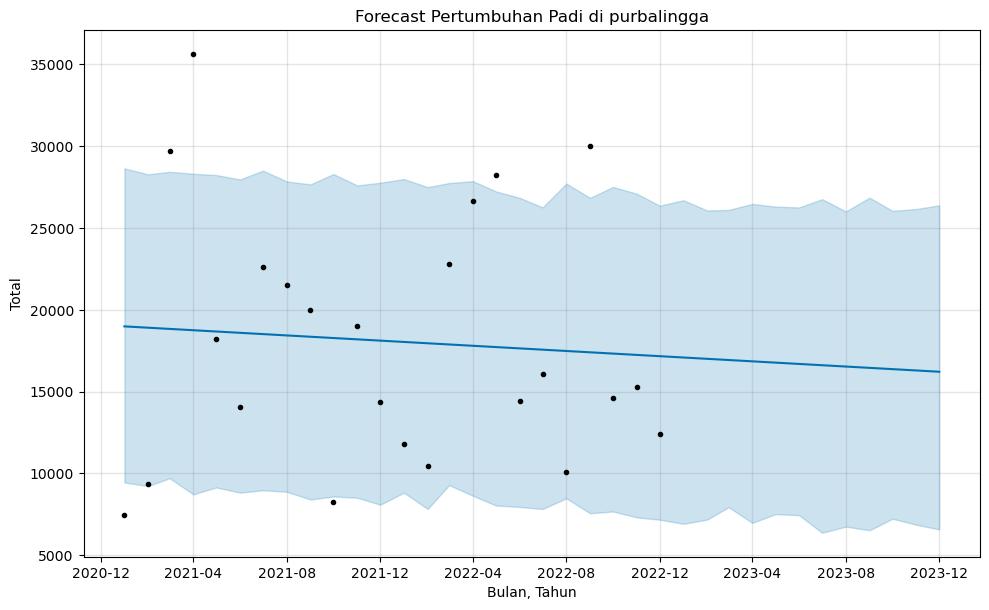

15:28:44 - cmdstanpy - INFO - Chain [1] start processing
15:28:44 - cmdstanpy - INFO - Chain [1] done processing


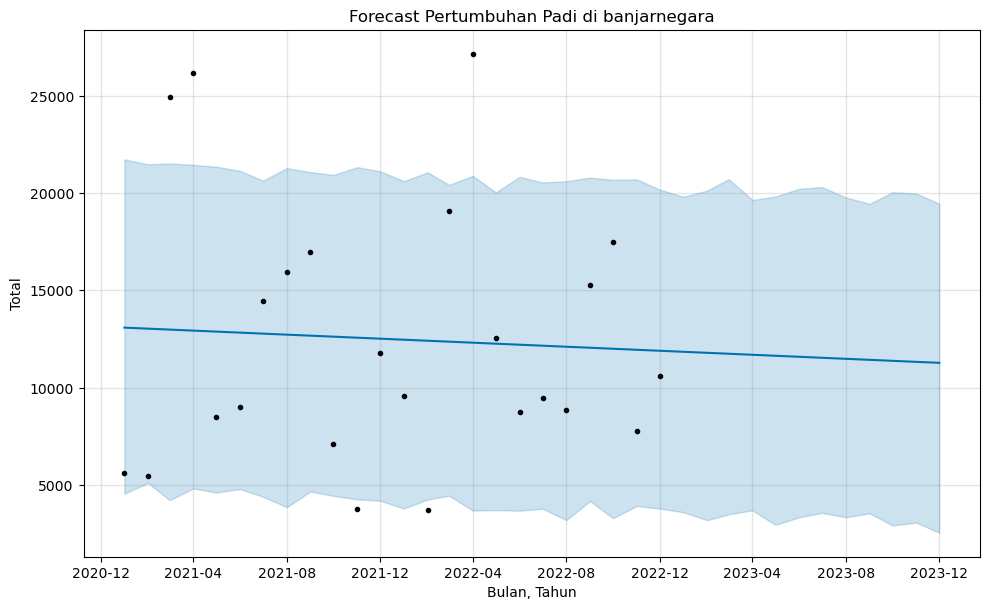

15:28:44 - cmdstanpy - INFO - Chain [1] start processing
15:28:44 - cmdstanpy - INFO - Chain [1] done processing


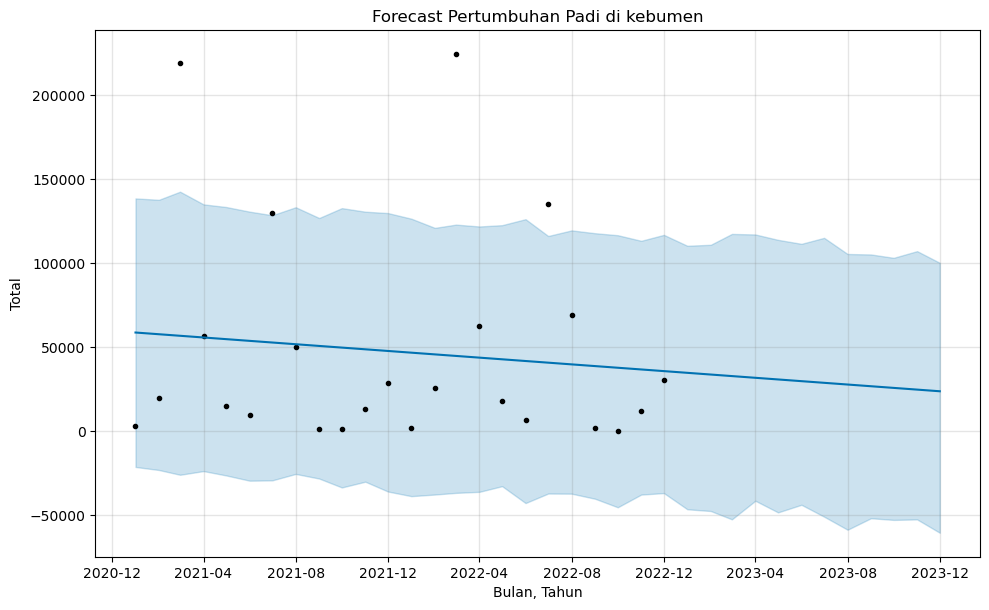

15:28:45 - cmdstanpy - INFO - Chain [1] start processing
15:28:45 - cmdstanpy - INFO - Chain [1] done processing


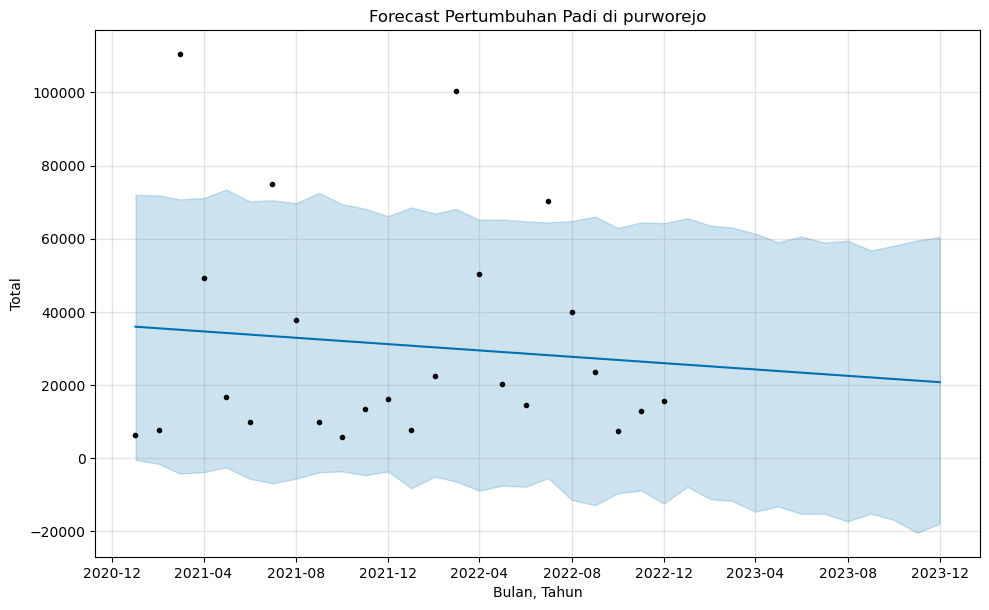

15:28:45 - cmdstanpy - INFO - Chain [1] start processing
15:28:45 - cmdstanpy - INFO - Chain [1] done processing


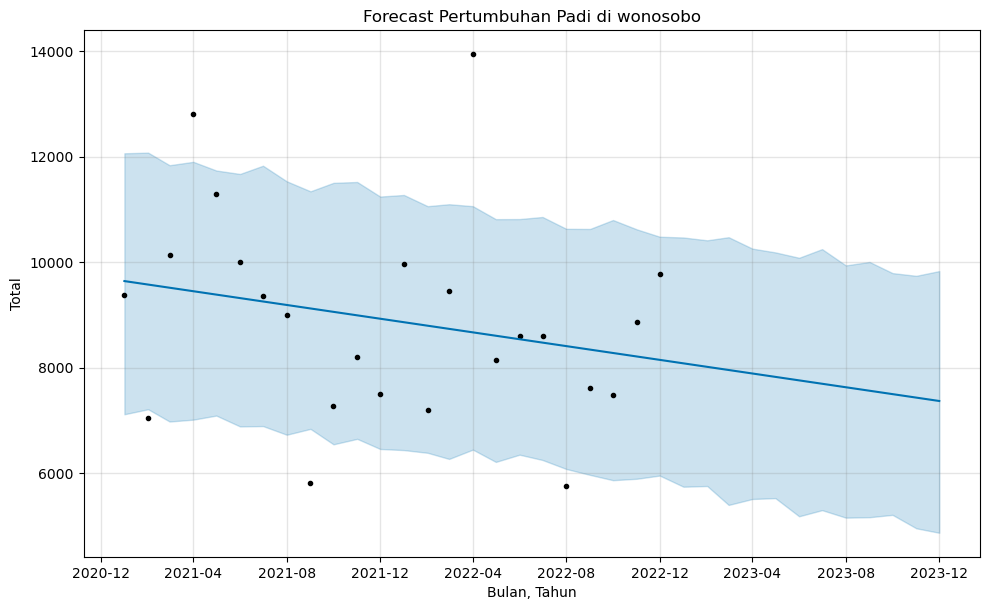

15:28:46 - cmdstanpy - INFO - Chain [1] start processing
15:28:46 - cmdstanpy - INFO - Chain [1] done processing


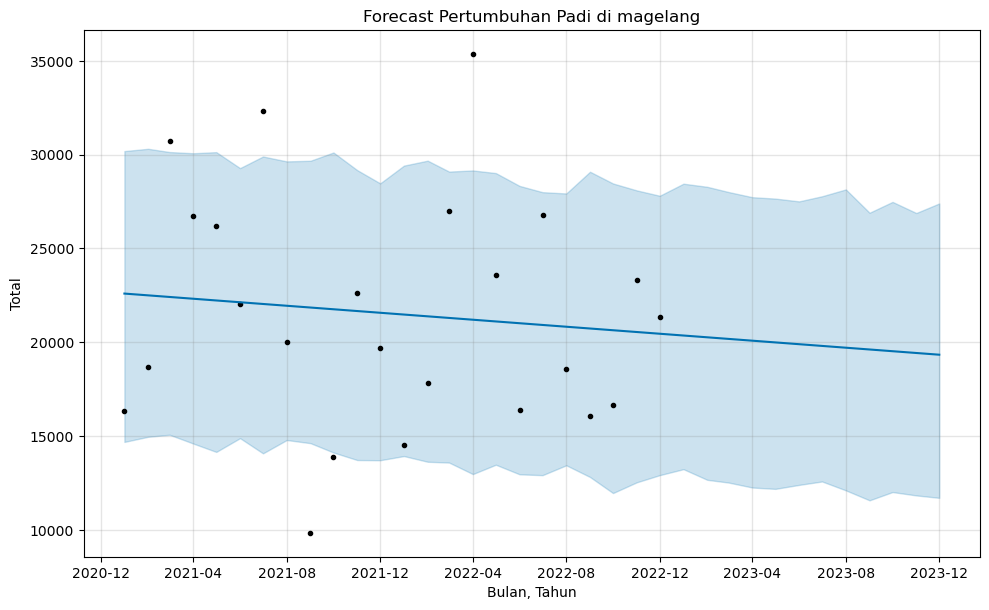

15:28:46 - cmdstanpy - INFO - Chain [1] start processing
15:28:46 - cmdstanpy - INFO - Chain [1] done processing


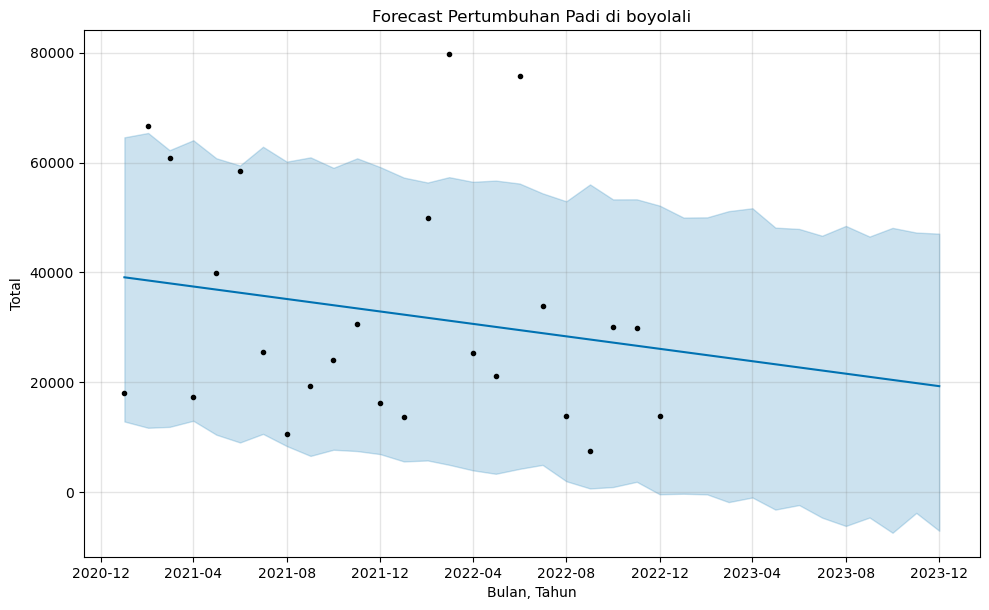

15:28:46 - cmdstanpy - INFO - Chain [1] start processing
15:28:46 - cmdstanpy - INFO - Chain [1] done processing


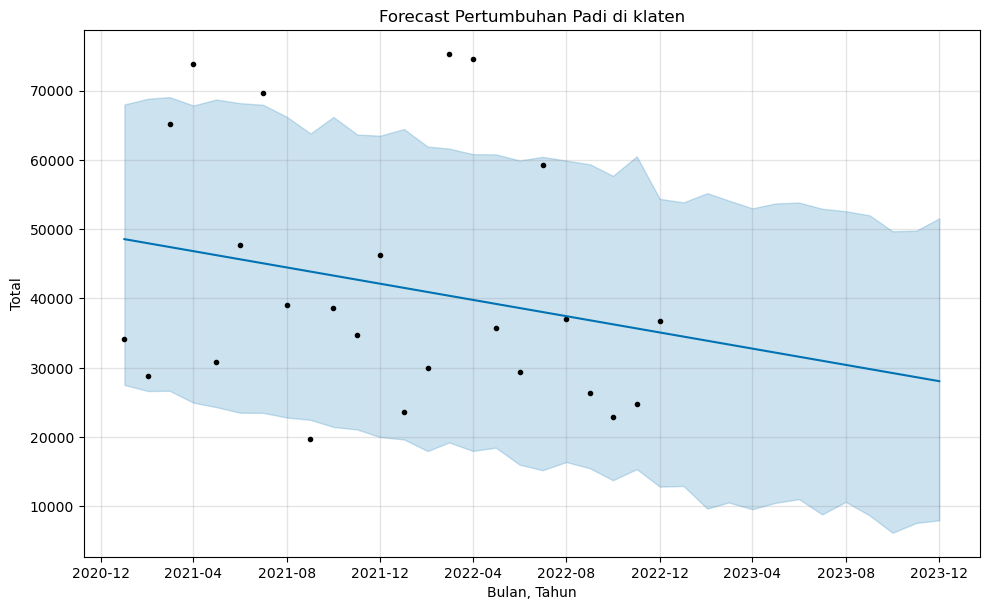

15:28:47 - cmdstanpy - INFO - Chain [1] start processing
15:28:47 - cmdstanpy - INFO - Chain [1] done processing


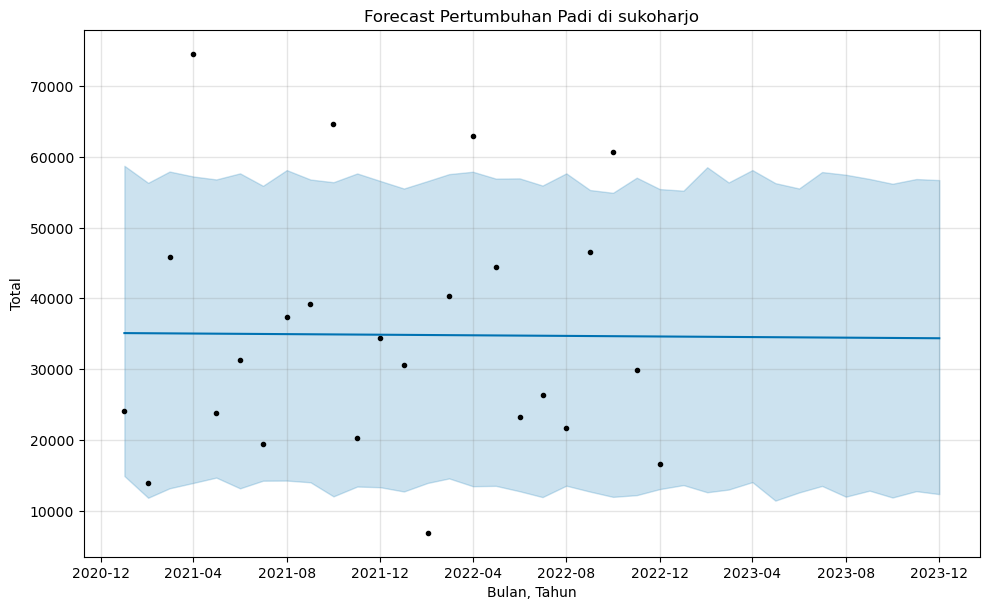

15:28:47 - cmdstanpy - INFO - Chain [1] start processing
15:28:47 - cmdstanpy - INFO - Chain [1] done processing


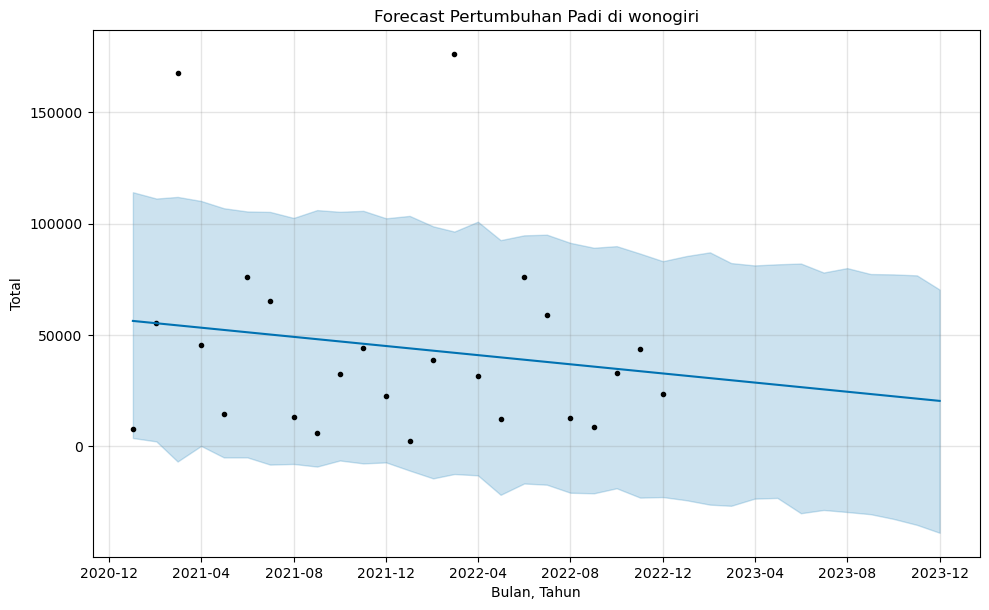

15:28:48 - cmdstanpy - INFO - Chain [1] start processing
15:28:48 - cmdstanpy - INFO - Chain [1] done processing


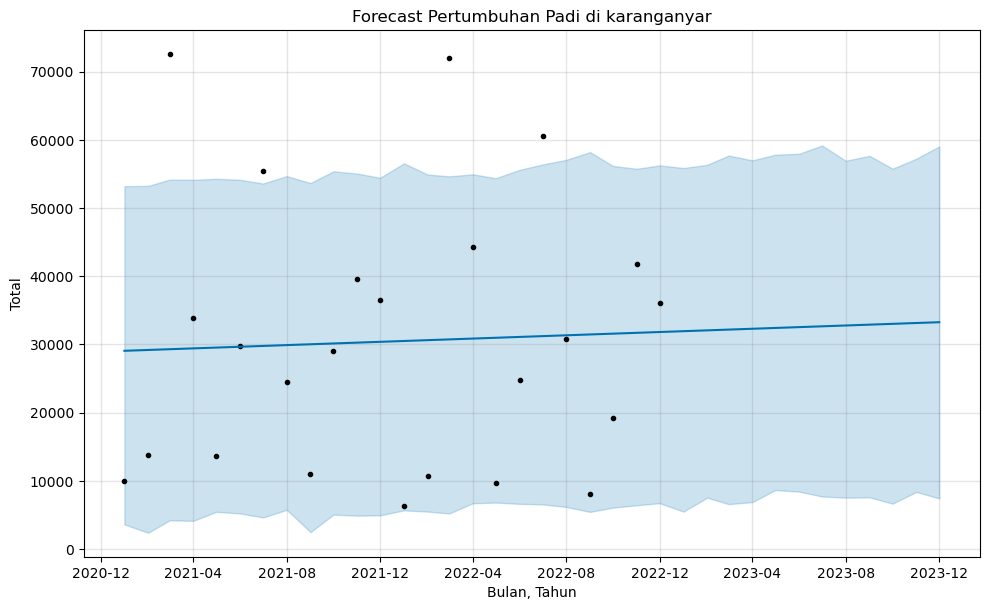

15:28:48 - cmdstanpy - INFO - Chain [1] start processing
15:28:48 - cmdstanpy - INFO - Chain [1] done processing


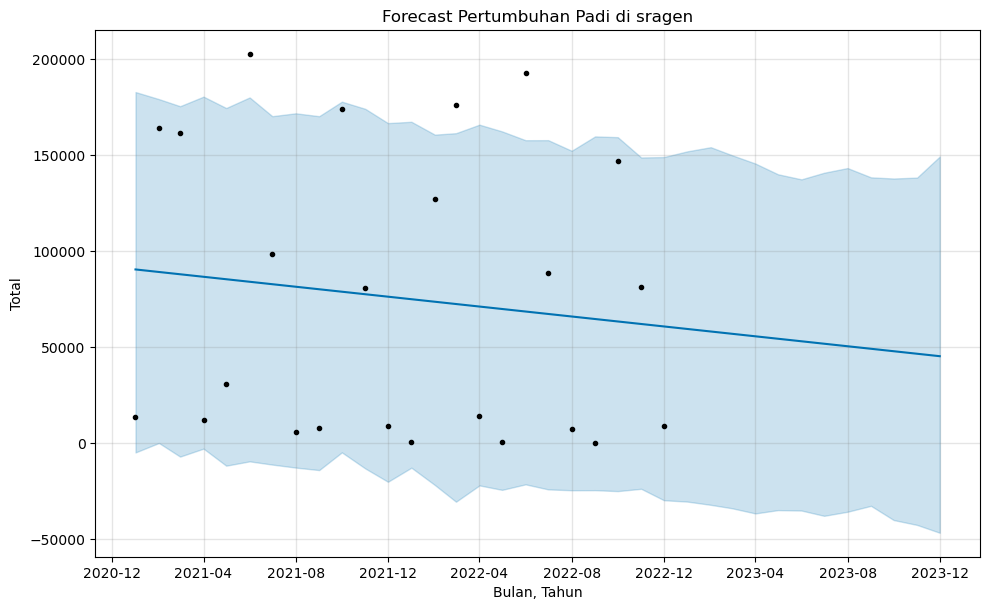

15:28:48 - cmdstanpy - INFO - Chain [1] start processing
15:28:48 - cmdstanpy - INFO - Chain [1] done processing


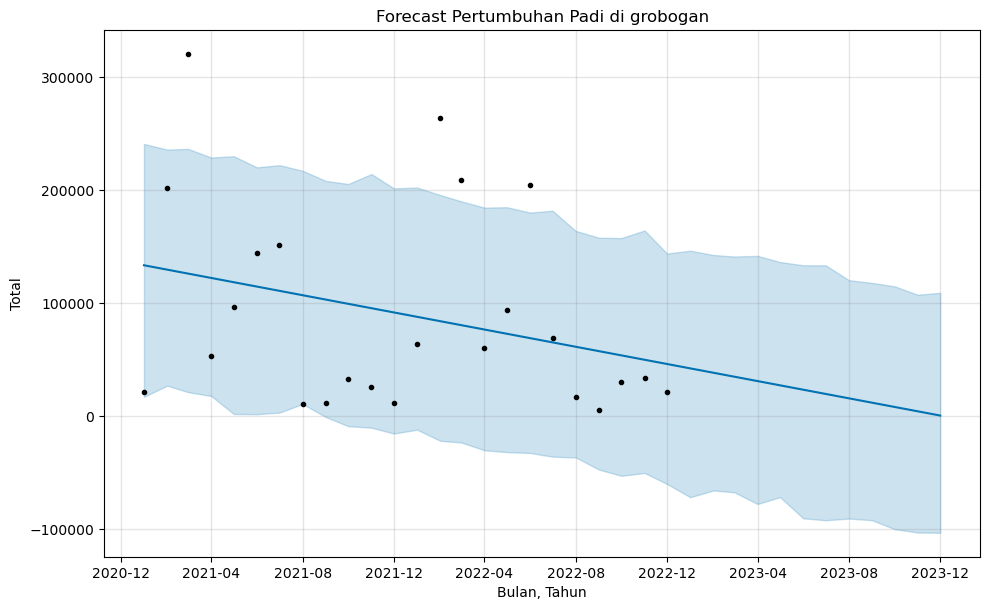

15:28:49 - cmdstanpy - INFO - Chain [1] start processing
15:28:49 - cmdstanpy - INFO - Chain [1] done processing


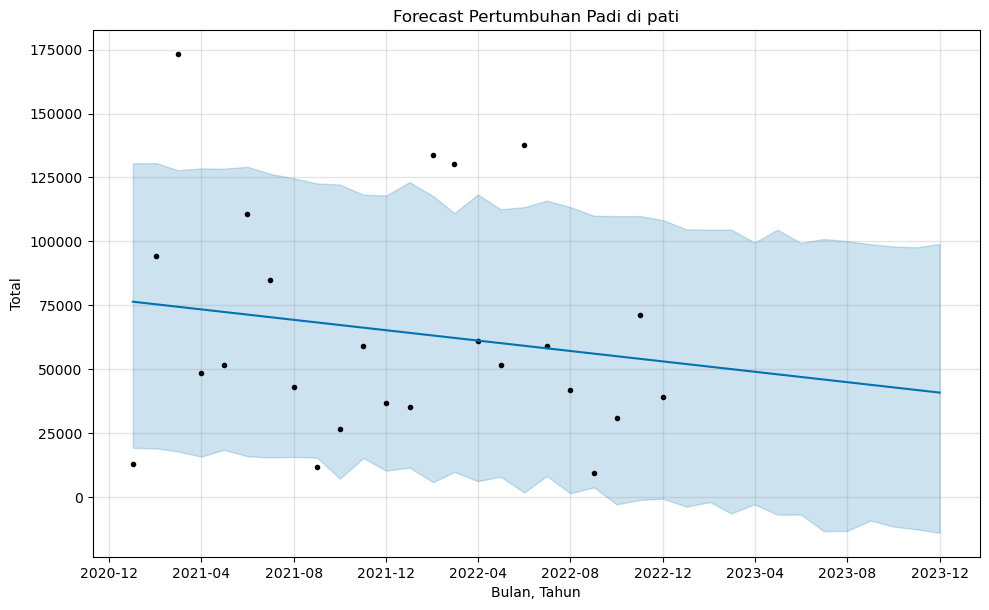

15:28:49 - cmdstanpy - INFO - Chain [1] start processing
15:28:49 - cmdstanpy - INFO - Chain [1] done processing


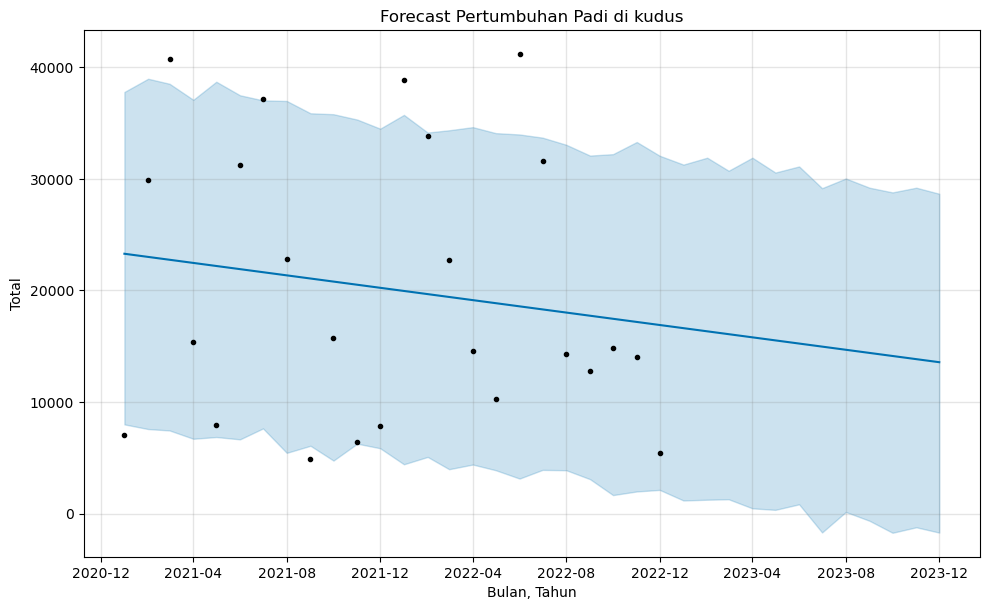

15:28:50 - cmdstanpy - INFO - Chain [1] start processing
15:28:50 - cmdstanpy - INFO - Chain [1] done processing


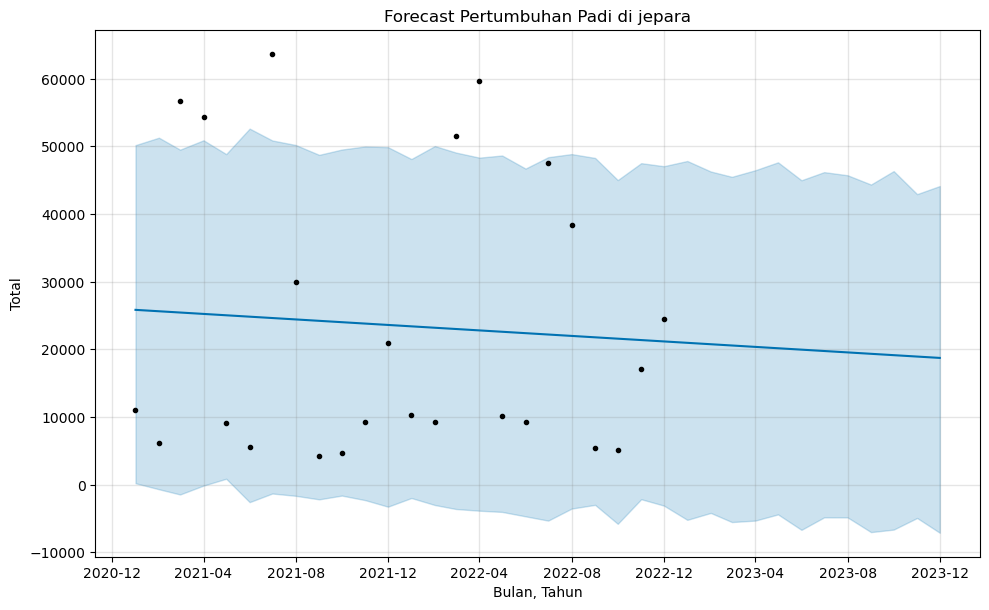

15:28:50 - cmdstanpy - INFO - Chain [1] start processing
15:28:50 - cmdstanpy - INFO - Chain [1] done processing


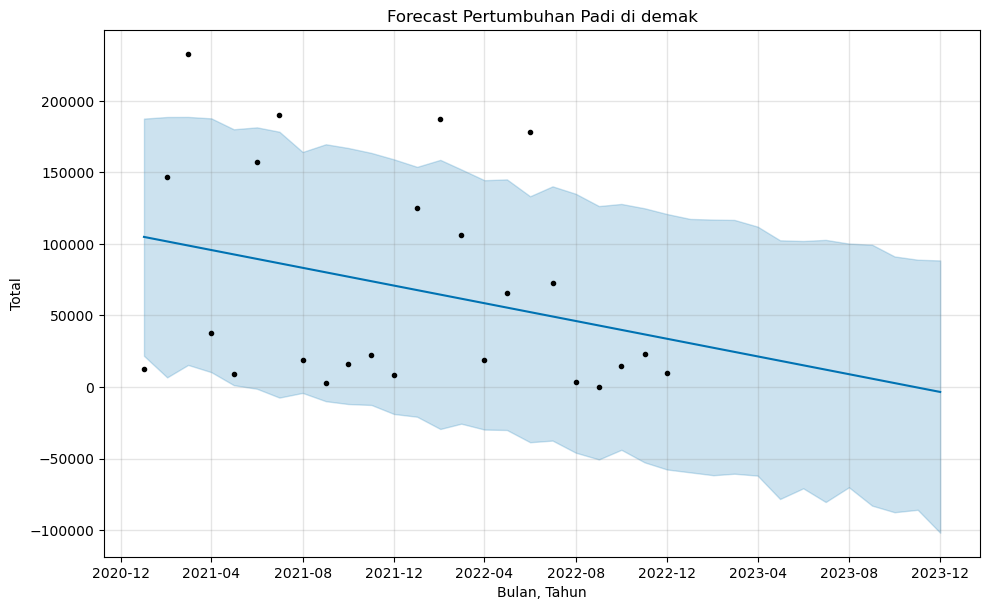

15:28:50 - cmdstanpy - INFO - Chain [1] start processing
15:28:50 - cmdstanpy - INFO - Chain [1] done processing


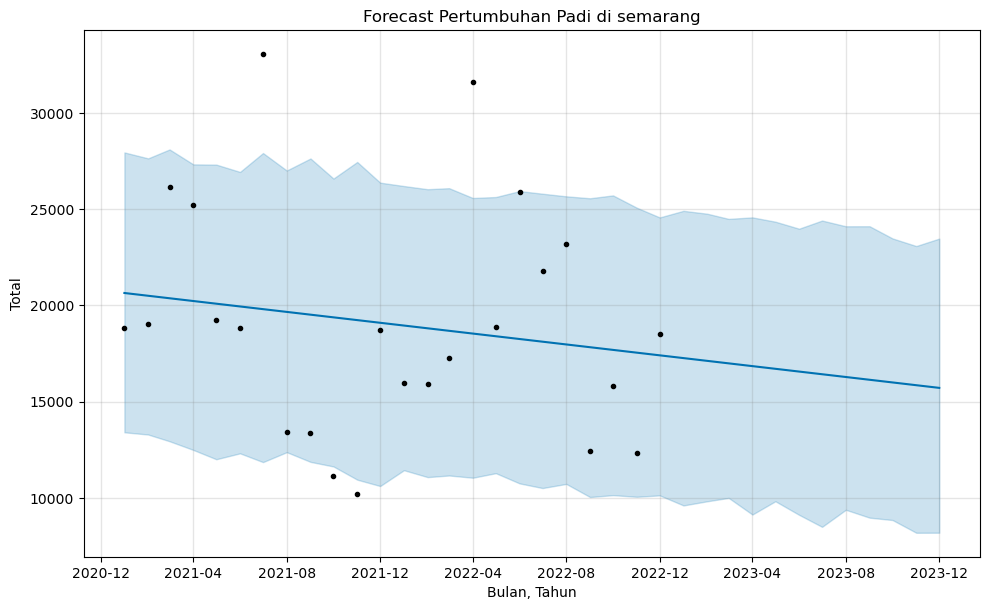

15:28:51 - cmdstanpy - INFO - Chain [1] start processing
15:28:51 - cmdstanpy - INFO - Chain [1] done processing


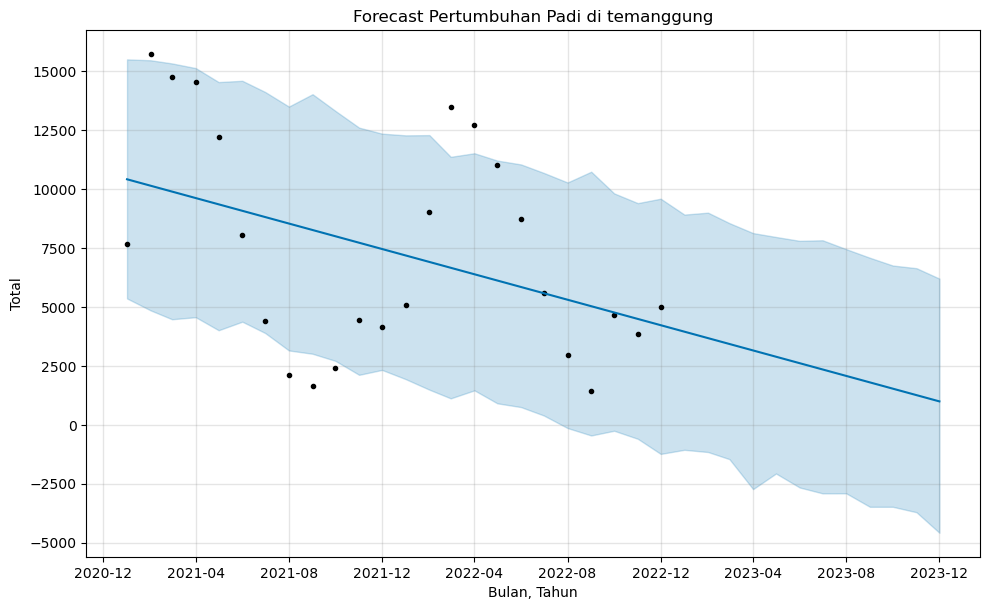

15:28:51 - cmdstanpy - INFO - Chain [1] start processing
15:28:51 - cmdstanpy - INFO - Chain [1] done processing


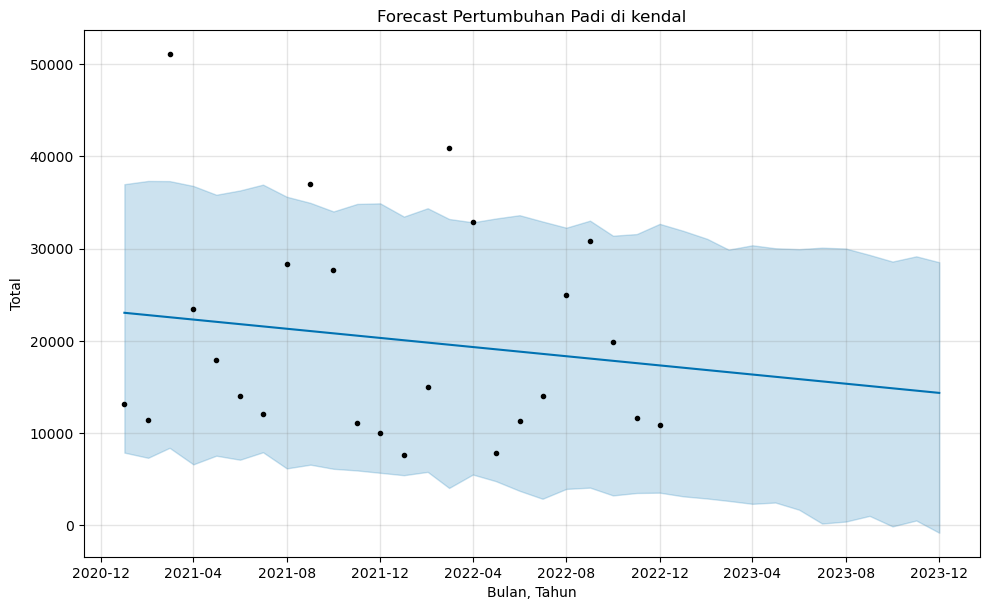

15:28:52 - cmdstanpy - INFO - Chain [1] start processing
15:28:52 - cmdstanpy - INFO - Chain [1] done processing


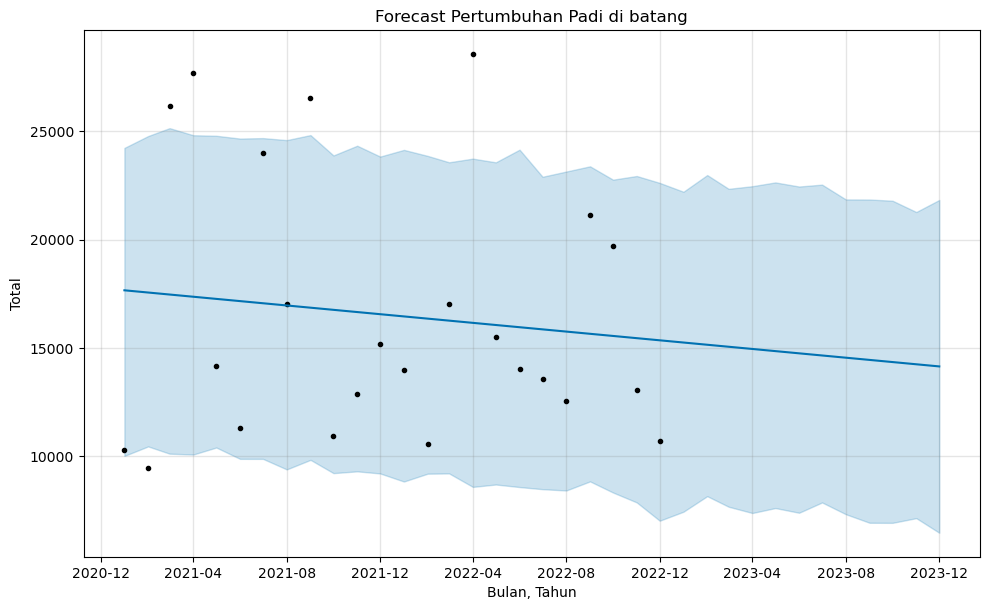

15:28:52 - cmdstanpy - INFO - Chain [1] start processing
15:28:52 - cmdstanpy - INFO - Chain [1] done processing


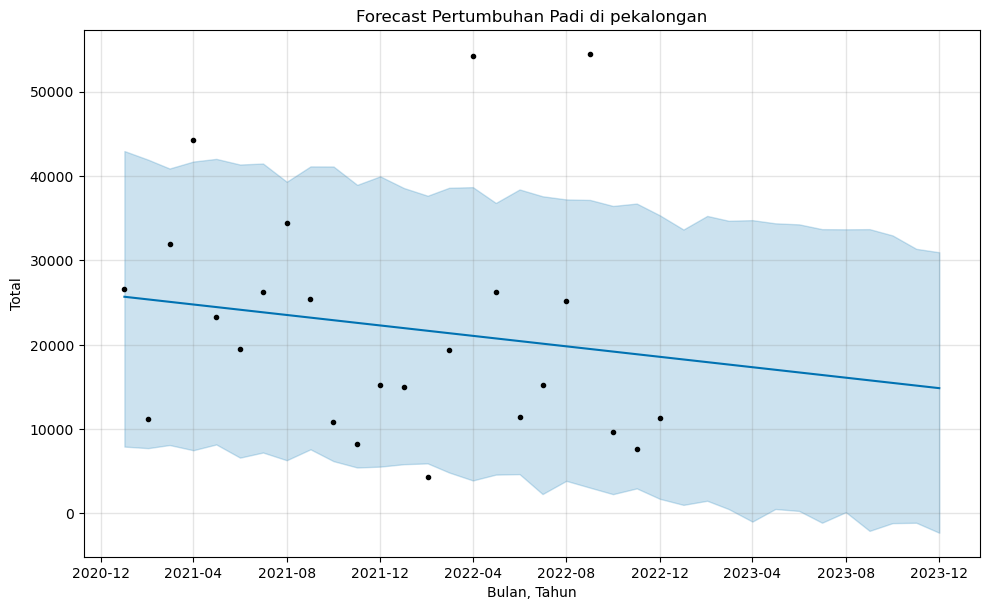

15:28:52 - cmdstanpy - INFO - Chain [1] start processing
15:28:52 - cmdstanpy - INFO - Chain [1] done processing


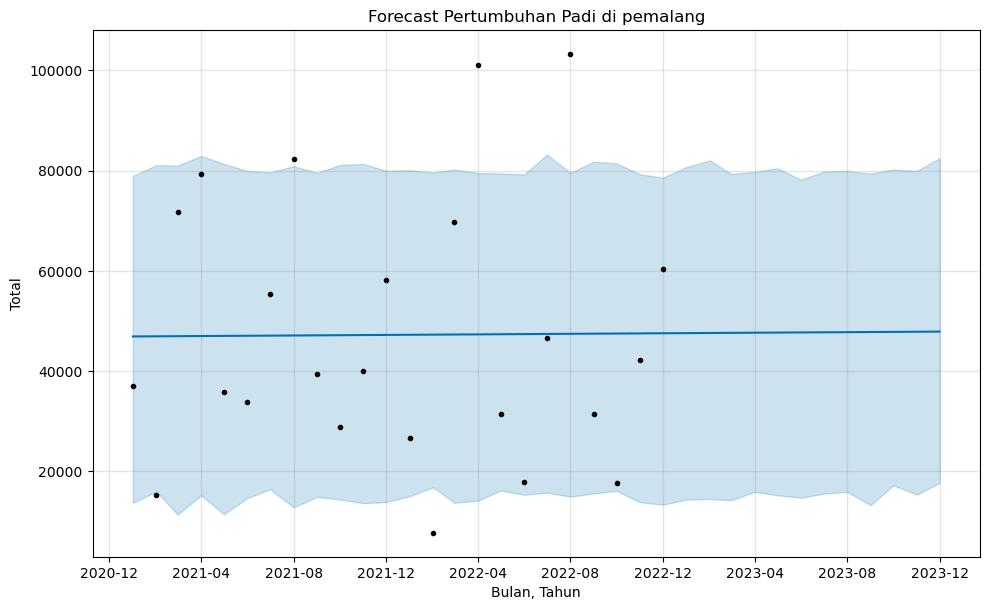

15:28:53 - cmdstanpy - INFO - Chain [1] start processing
15:28:53 - cmdstanpy - INFO - Chain [1] done processing


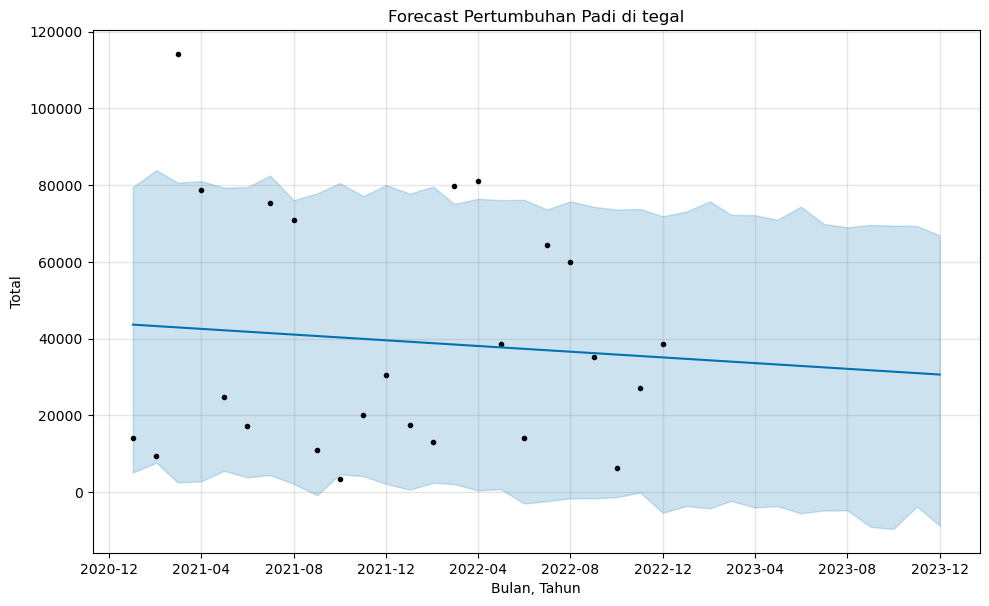

15:28:53 - cmdstanpy - INFO - Chain [1] start processing
15:28:53 - cmdstanpy - INFO - Chain [1] done processing


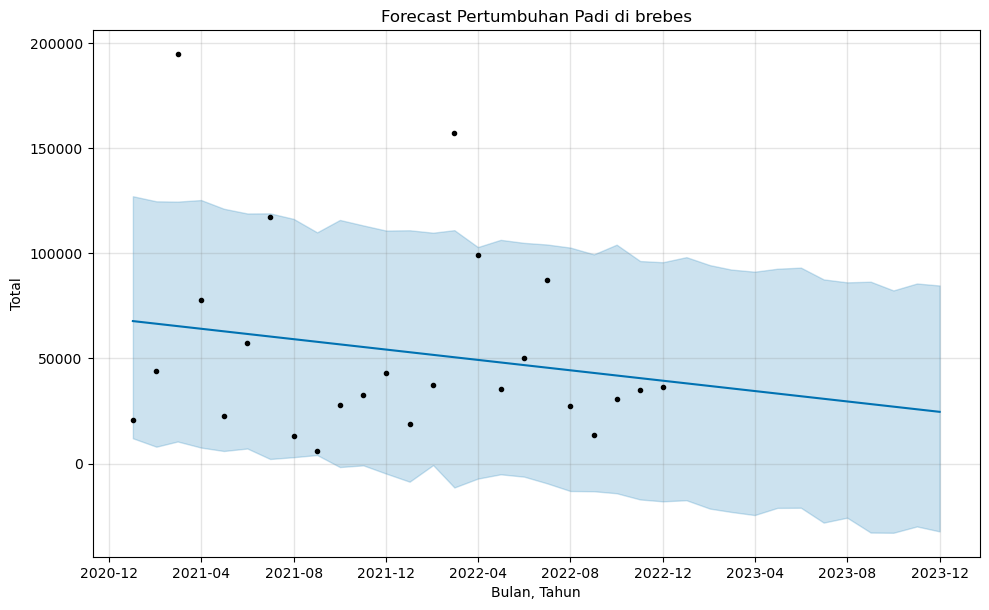

15:28:54 - cmdstanpy - INFO - Chain [1] start processing
15:28:54 - cmdstanpy - INFO - Chain [1] done processing


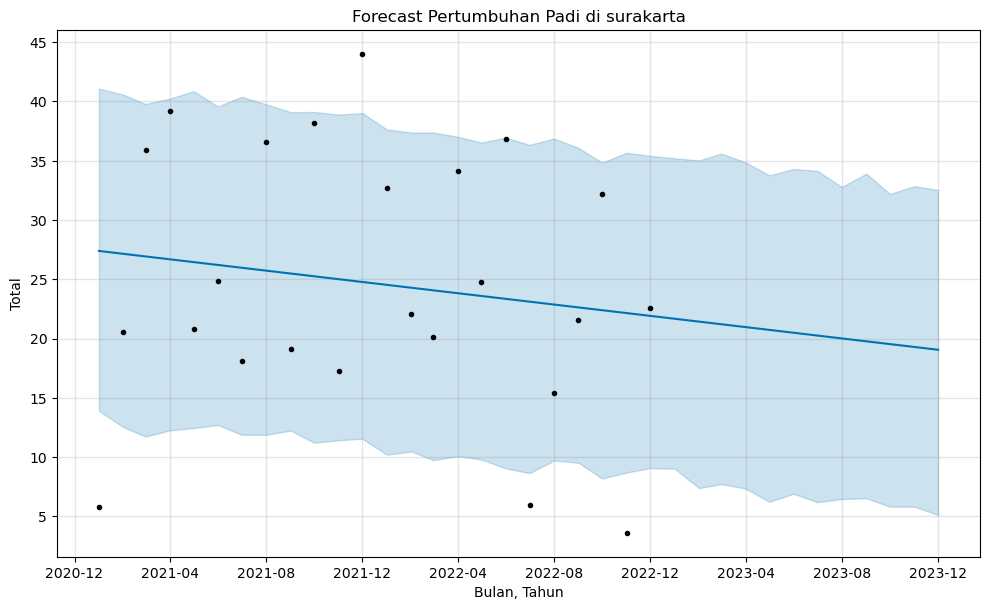

15:28:54 - cmdstanpy - INFO - Chain [1] start processing
15:28:54 - cmdstanpy - INFO - Chain [1] done processing


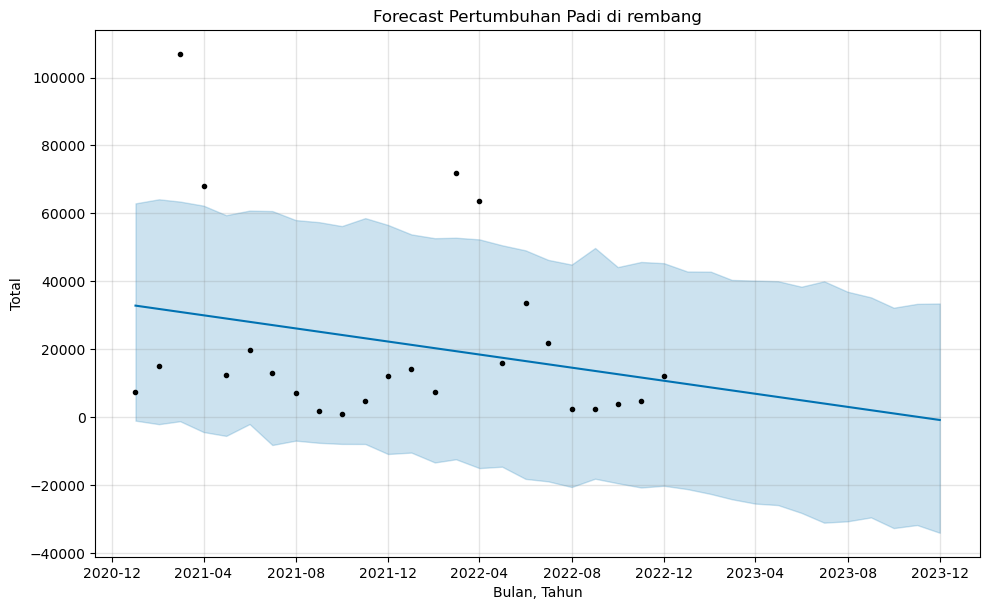

15:28:54 - cmdstanpy - INFO - Chain [1] start processing
15:28:55 - cmdstanpy - INFO - Chain [1] done processing


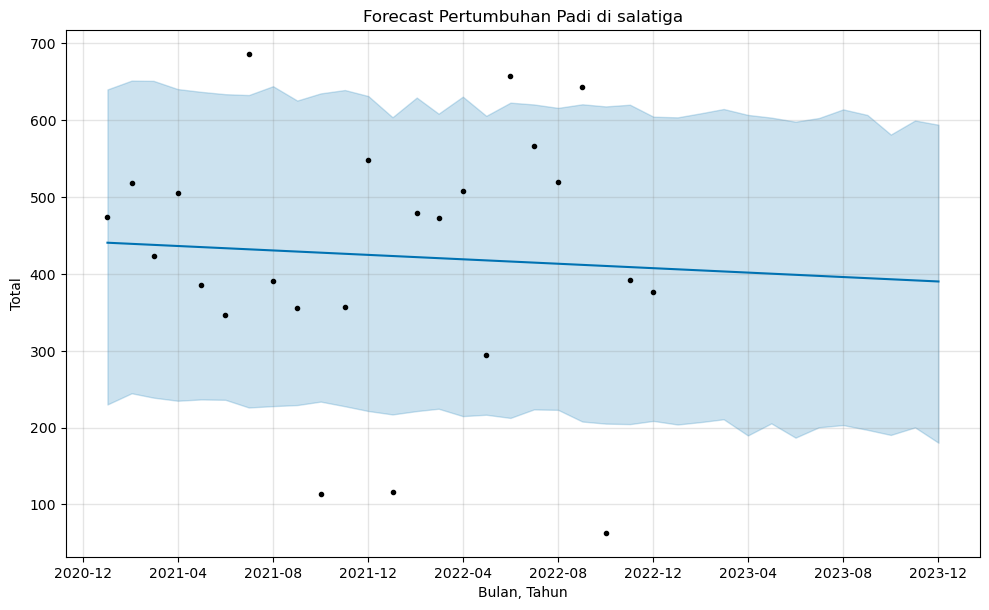

15:28:55 - cmdstanpy - INFO - Chain [1] start processing
15:28:55 - cmdstanpy - INFO - Chain [1] done processing


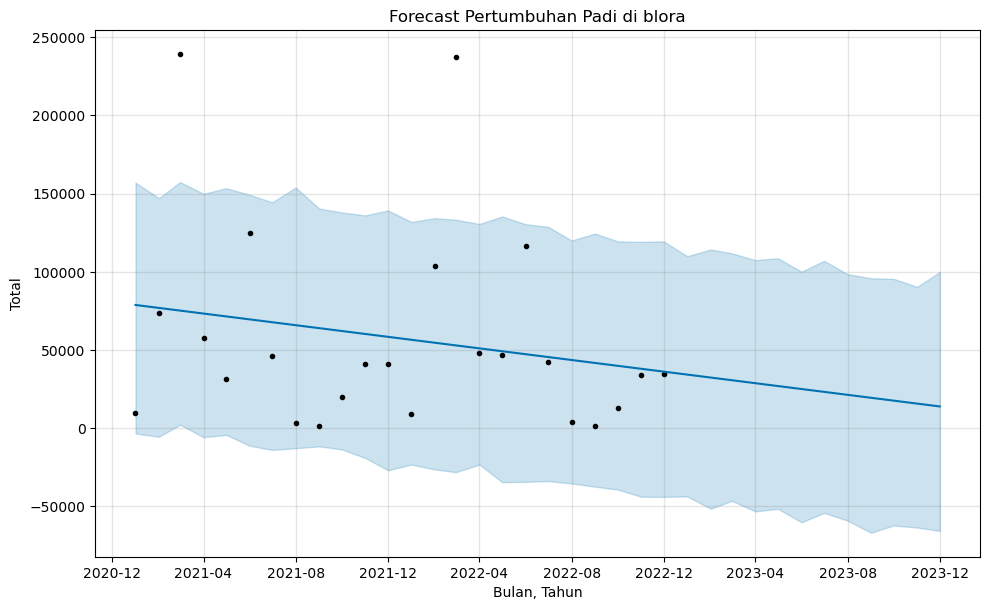

In [18]:
for kota in data_filtered["daerah"].unique():
    df_kota = data_filtered[data_filtered["daerah"] == kota]
    
    df_grouped = df_kota.groupby("tanggal")["total"].sum().reset_index()
    
    df_prophet = df_grouped.rename(columns={"tanggal": "ds", "total": "y"})
    
    if df_prophet.shape[0] < 2:
        print(f"Data tidak cukup untuk forecast di {kota}")
        continue

    model = Prophet()
    model.fit(df_prophet)
    

    future = model.make_future_dataframe(periods=bulan_forecast_input, freq='MS')
    forecast = model.predict(future)
    
    # Plot forecast
    fig = model.plot(forecast)
    plt.title(f"Forecast Pertumbuhan {tanaman_input.capitalize()} di {kota}")
    plt.xlabel("Bulan, Tahun")
    plt.ylabel("Total")
    plt.grid(True)
    plt.show()